In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample

In [33]:
dataset = pd.read_csv('train.csv')


In [34]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [35]:
def sigmoid(x):
   return 1/(1 + np.exp(-x))

In [36]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

In [37]:
print(x)


[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]


In [38]:
X, Y = np.meshgrid(x, y)


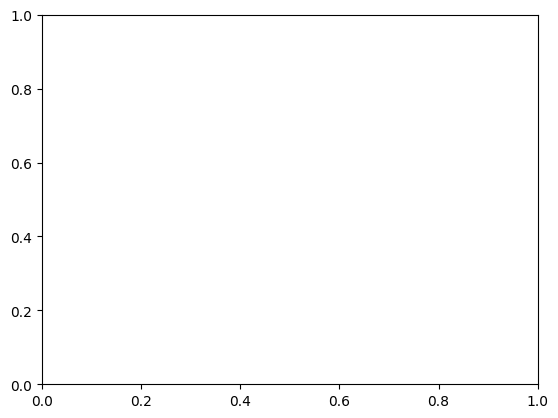

In [39]:
a,b = plt.subplots(1,1)


In [40]:
def f(x, y):
       return x**2 + y **2

In [41]:
Z = f(X, Y)


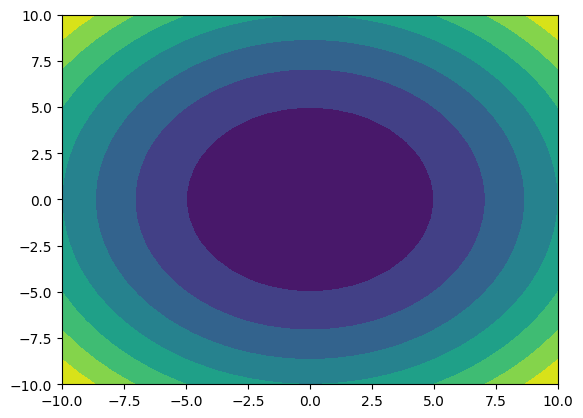

In [42]:
plt.contourf(X, Y, Z)


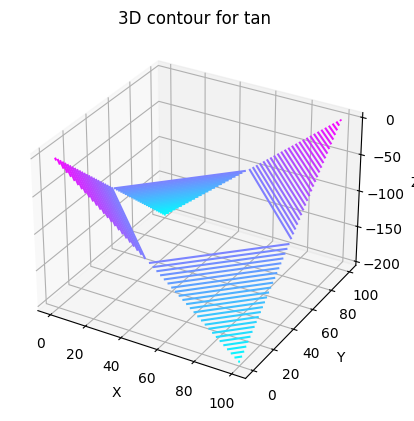

In [43]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

x = [i for i in range(0, 200, 100)]
y = [i for i in range(0, 200, 100)]

X, Y = np.meshgrid(x, y)
Z = []
for i in x:
    t = []
    for j in y:
        t.append(math.tan(math.sqrt(i*2+j*2)))
    Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.cool)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D contour for tan')
plt.show()

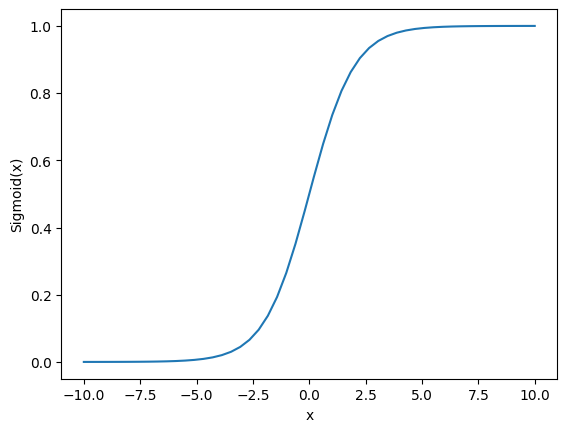

In [44]:
x = np.linspace(-10, 10, 50)
p = sigmoid(x)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.plot(x, p)
plt.show()


In [45]:
dataset = pd.read_csv('gender.csv')


In [46]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [47]:
class Sigmoid_Neuron:
    def __init__(self, learning_rate=0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.iters = iterations
        self.bias = None
        self.errorPerItr = None
        self.weight = None

    def predict_values(self, valuea):
        y_pred = []
        for i in range(len(valuea)):
            x=valuea.iloc[i]
            weighted_input = np.dot(x, self.weight) + self.bias  # weighted input + bias
            y_predicted = self.sigmoid_function(weighted_input)  # applying sigmoid function to weighted input
            y_pred.append(y_predicted)
        return y_pred

    def sigmoid_function(self,t):
        return 1.0/(1.0 + np.exp(-t))

    def GD_algorithm(self, valuea, valueb):
        self.bias = 0
        n_features = valuea.shape[1]
        self.weight = np.zeros(n_features)

        #ensure that y is 0 or 1
        y = np.array([1 if i>0 else 0 for i in valueb])

        self.errorPerItr = []
        #we assume that sigmoid model will converge in finite iterations
        for itr in range(self.iters):
            grad_weight = 0
            grad_bias = 0
            loss = 0
            for i in range(len(valuea)):
                x=valuea.iloc[i]
                linear_output = np.dot(x, self.weight) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                fx = y_predicted

                y= valueb.iloc[i]
                grad_weight += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_bias += (fx - y)*fx*(1-fx)

                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss) #0.5 is justfor convenience
            print("Loss: ", 0.5 * loss)

            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.weight[i] -= self.learning_rate*grad_weight
            self.bias -= self.learning_rate*grad_bias    # b is a scalar
            print("weights: ", self.weight)
            print("Bias: ", self.bias)


In [48]:
dataset = dataset.dropna()


In [49]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [50]:
columns = ["long_hair", "nose_long", "gender"]
dataset = dataset[columns]
dataset

,long_hair,nose_long,gender
0,1,0,Male
1,0,0,Female
2,0,1,Male
3,0,1,Male
4,1,0,Female
...,...,...,...
4996,1,0,Female
4997,1,0,Female
4998,1,0,Female
4999,1,0,Female


In [51]:
# Replace illness dataframe by 1 if it is yes otherwise 0
dataset['gender'] = dataset['gender'].replace(to_replace='Male', value=0)
dataset['gender'] = dataset['gender'].replace(to_replace='Female', value=1)

<ipython-input-51-8189c4f06c04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender'] = dataset['gender'].replace(to_replace='Male', value=0)
<ipython-input-51-8189c4f06c04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender'] = dataset['gender'].replace(to_replace='Female', value=1)


In [52]:
dataset['gender'].value_counts()


1    2501
0    2500
Name: gender, dtype: int64

In [53]:
# balancing the dataset by reducing records of class 0
class_0 = dataset[dataset.gender!=1]
class_0

,long_hair,nose_long,gender
0,1,0,0
2,0,1,0
3,0,1,0
5,1,1,0
6,1,1,0
...,...,...,...
4987,1,1,0
4992,1,1,0
4994,1,1,0
4995,1,1,0


In [54]:
class_0 = class_0.loc[0:12139]
class_0["gender"].value_counts()

0    2500
Name: gender, dtype: int64

In [55]:
class_1 = dataset[dataset.gender!=0]
class_1["gender"].value_counts()

1    2501
Name: gender, dtype: int64

In [56]:
frames = [class_0, class_1]

balanced_data = pd.concat(frames)
display(balanced_data["gender"].value_counts())
display(balanced_data.shape)

1    2501
0    2500
Name: gender, dtype: int64

(5001, 3)

In [57]:
# split training and test data
from sklearn.model_selection import train_test_split
x = balanced_data.drop("gender", axis = 1)
y = balanced_data["gender"]
display(x)
display(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify = y)
print("X ",x.shape,x_train.shape, x_test.shape)
print("Y means: ",y.mean(),y_train.mean(), y_test.mean())

,long_hair,nose_long
0,1,0
2,0,1
3,0,1
5,1,1
6,1,1
...,...,...
4993,1,0
4996,1,0
4997,1,0
4998,1,0


0       0
2       0
3       0
5       0
6       0
       ..
4993    1
4996    1
4997    1
4998    1
4999    1
Name: gender, Length: 5001, dtype: int64

X  (5001, 2) (4500, 2) (501, 2)
Y means:  0.5000999800039992 0.5 0.500998003992016


In [58]:
sigModel = Sigmoid_Neuron(learning_rate = 0.01, iterations=5)


In [59]:
# Calling GD function
sigModel.GD_algorithm(x_train,y_train)

Loss:  562.5
weights:  [-2.08625 -2.08625]
Bias:  0.0
Loss:  854.9814808011241
weights:  [-0.55487374 -0.55487374]
Bias:  1.7519557528617689
Loss:  592.9807229337
weights:  [-5.19469659 -5.19469659]
Bias:  -0.5357180495011324
Loss:  1046.7549272990796
weights:  [-5.13907302 -5.13907302]
Bias:  -0.1503421606204166
Loss:  1031.771902733768
weights:  [-5.05311556 -5.05311556]
Bias:  0.2182277305017536


In [60]:
def accuracy(y_testing, y_pred):
    accuracy = np.sum(y_testing == y_pred) / len(y_testing)
    return accuracy

In [61]:
prediction = sigModel.predict_values(x_test)
print("Sigmoid Classification accuracy is: ",accuracy(y_test, prediction))

Sigmoid Classification accuracy is:  0.0
